Part II. Question 1

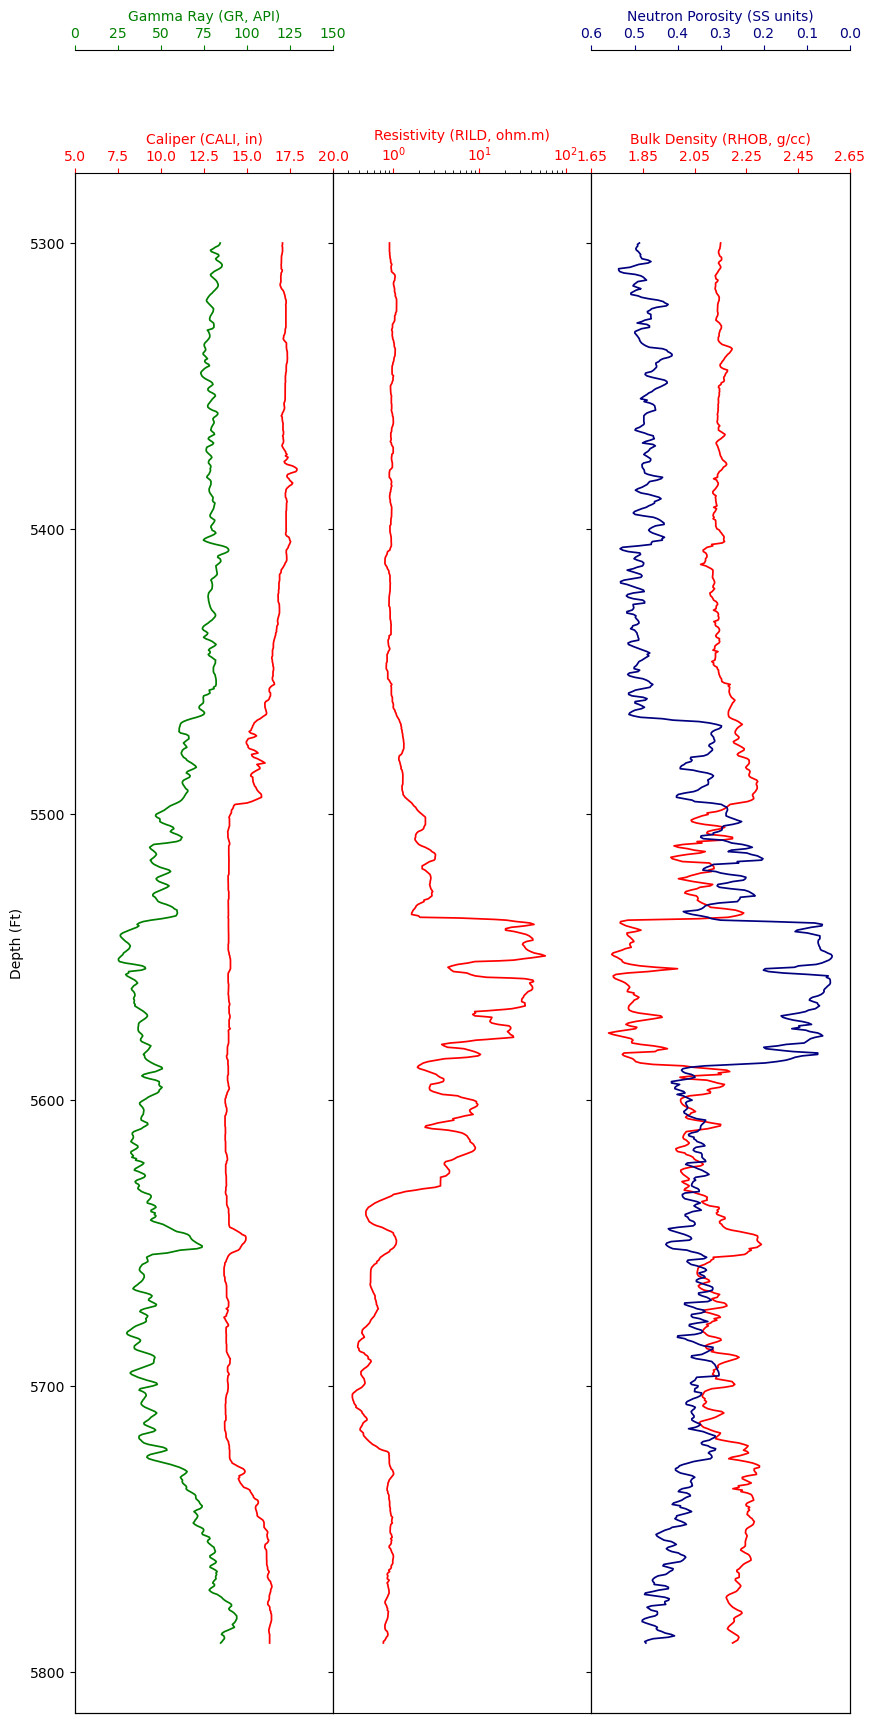

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the Excel data
file_path = "HW2_data.xlsx"  # Ensure correct path
xls = pd.ExcelFile(file_path)

# Load the dataset
df = pd.read_excel(xls, sheet_name='SingleSet_GOM')

# Rename depth column for easier access and strip any extra spaces
df.rename(columns=lambda x: x.strip(), inplace=True)

# Convert relevant columns to numeric values
numeric_columns = ['CALI', 'GR', 'RILD', 'RHOB', 'NPHI', '~A DEPTH']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Create a new column for CALI in feet
df['CALI_ft'] = df['CALI'] * 12

# Now filter data for depth range 5300 - 5800 ft
df_filtered = df[(df['~A DEPTH'] >= 5300) & (df['~A DEPTH'] <= 5800)]

# Create subplots with a specific grid layout (3 columns in one row)
fig, axes = plt.subplots(1, 3, figsize=(10, 20), sharey=True)

# Curve names for labeling
curve_names = ['Caliper (CALI, in)', 'Gamma Ray (GR, API)', 'Resistivity (RILD, ohm.m)', 
               'Bulk Density (RHOB, g/cc)', 'Neutron Porosity (SS units)']

ax1 = axes[0]
ax2 = ax1.twiny()  # Create secondary axis for Caliper plot
ax3 = axes[1]
ax4 = axes[2]
ax5 = ax4.twiny()  # Create secondary axis for Neutron Porosity plot

# Plot data for each axis
ax1.plot(df_filtered['CALI_ft'], df_filtered['~A DEPTH'], color='red', linewidth=1.25)
ax1.invert_yaxis()
ax1.set_ylabel('Depth (Ft)')
ax1.set_xlim(5, 20)
ax1.xaxis.label.set_color('red')
ax1.tick_params(axis='x', colors='red')

ax2.plot(df_filtered['GR'], df_filtered['~A DEPTH'], color='green', linewidth=1.25)
ax2.set_xlim(0, 150)
ax2.spines['top'].set_position(('axes', 1.08))
ax2.spines['top'].set_visible(True)
ax2.xaxis.label.set_color('green')
ax2.tick_params(axis='x', colors='green')

ax3.plot(df_filtered['RILD'], df_filtered['~A DEPTH'], color='red', linewidth=1.25)
ax3.set_xscale('log')
ax3.set_xlim(0.2, 200)
ax3.xaxis.label.set_color('red')
ax3.tick_params(axis='x', colors='red')

ax4.plot(df_filtered['RHOB'], df_filtered['~A DEPTH'], color='red', linewidth=1.25)
ax4.set_xlim(1.65, 2.65)
ax4.xaxis.label.set_color('red')
ax4.tick_params(axis='x', colors='red')
ax4.set_xticks([1.65, 1.85, 2.05, 2.25, 2.45, 2.65])

ax5.plot(df_filtered['NPHI'], df_filtered['~A DEPTH'], color='navy', linewidth=1.25)
ax5.set_xlim(0.6, 0)
ax5.spines['top'].set_position(('axes', 1.08))
ax5.spines['top'].set_visible(True)
ax5.xaxis.label.set_color('navy')
ax5.tick_params(axis='x', colors='navy')

# Manually set the y-axis for all subplots
for ax in [ax1, ax2, ax3, ax4, ax5]:
    ax.xaxis.set_ticks_position('top')
    ax.xaxis.set_label_position('top')
    ax.grid(False)

# Assign x-axis labels from curve_names
axes_list = [ax1, ax2, ax3, ax4, ax5]
for i, ax in enumerate(axes_list):
    ax.set_xlabel(curve_names[i])  

# Hide y-tick labels for all axes except the first one
for ax in fig.axes[1:]:
    plt.setp(ax.get_yticklabels(), visible=False)

# Adjust spacing to prevent overlap
fig.subplots_adjust(wspace=0, hspace=0)

# Show plot
plt.show()


Part II. Question 2

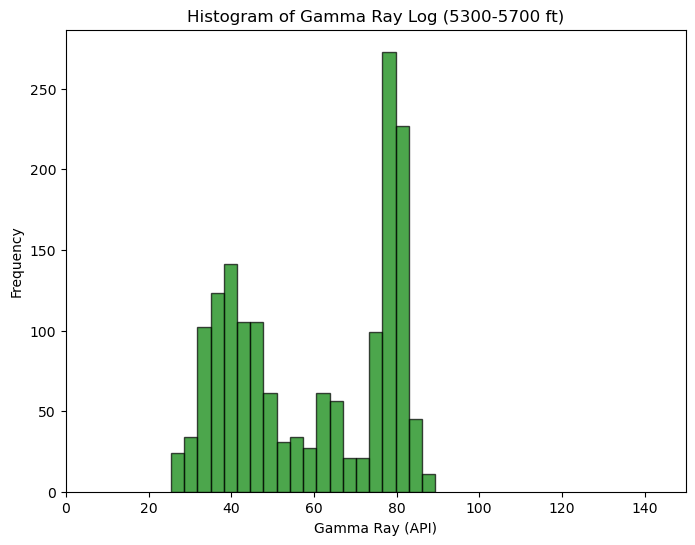

Number of peaks (modes): 4
Lithology Associations:
- Low Gamma Ray (~0-50 API) -> Sandstone
- High Gamma Ray (~50-150 API) -> Shale


In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks

# Filter data for depth range 5300 - 5700 ft
df_hist = df[(df['~A DEPTH'] >= 5300) & (df['~A DEPTH'] <= 5700)]

# Create histogram of Gamma Ray log
plt.figure(figsize=(8, 6))
n, bins, patches = plt.hist(df_hist['GR'], bins=20, color='green', edgecolor='black', alpha=0.7)

# Labeling the axes and title
plt.xlabel("Gamma Ray (API)")
plt.ylabel("Frequency")
plt.title("Histogram of Gamma Ray Log (5300-5700 ft)")
plt.xlim(0, 150)

# Show plot
plt.show()

# Identify the number of peaks (modes) using histogram bin analysis
peaks, _ = find_peaks(n, height=1)  # Finding peaks with height > 1

# Number of peaks (modes)
num_peaks = len(peaks)
print(f"Number of peaks (modes): {num_peaks}")

# Lithology association
print("Lithology Associations:")
print("- Low Gamma Ray (~0-50 API) -> Sandstone")
print("- High Gamma Ray (~50-150 API) -> Shale")


Part II. Question 3

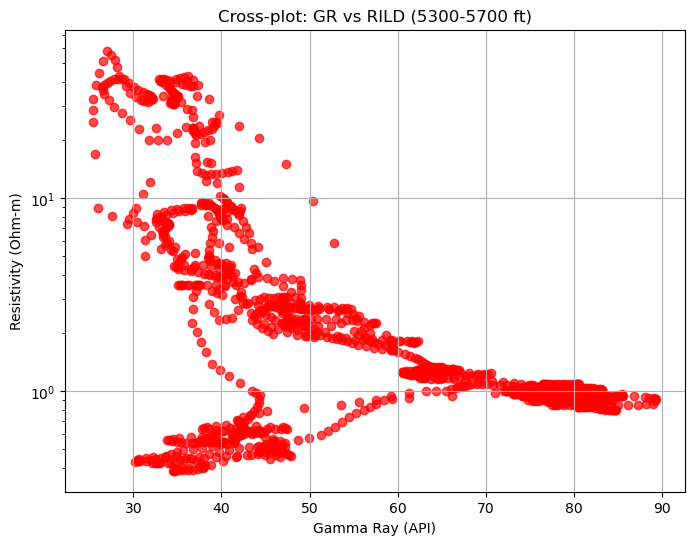

Number of distinct clusters: 2
Lithology Associations:
- Low GR & High Resistivity (~0-50 API, >10 Ohm-m) -> Hydrocarbon-bearing Sandstone
- High GR & Low Resistivity (~50-150 API, <10 Ohm-m) -> Shale or Water-bearing Sandstone


In [4]:
import matplotlib.pyplot as plt
import warnings
from sklearn.cluster import KMeans

# Suppress KMeans-related warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Filter data for depth range 5300 - 5700 ft
df_crossplot = df[(df['~A DEPTH'] >= 5300) & (df['~A DEPTH'] <= 5700)]

# Create cross-plot: GR vs RILD (logarithmic scale)
plt.figure(figsize=(8, 6))
plt.scatter(df_crossplot['GR'], df_crossplot['RILD'], color='red', alpha=0.7)
plt.xscale("linear")  # Keeping Gamma Ray in linear scale
plt.yscale("log")  # Resistivity is plotted on a logarithmic scale

# Label axes and title
plt.xlabel("Gamma Ray (API)")
plt.ylabel("Resistivity (Ohm-m)")
plt.title("Cross-plot: GR vs RILD (5300-5700 ft)")
plt.grid(True)

# Show plot
plt.show()

# Identify the number of clusters using KMeans
X = df_crossplot[['GR', 'RILD']].dropna().values  # Remove NaNs before clustering

# Use KMeans clustering to determine clusters
num_clusters = 2  # Assuming two dominant lithologies (sandstone & shale)
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
kmeans.fit(X)

# Cluster centers
cluster_centers = kmeans.cluster_centers_

# Number of clusters identified
num_clusters = len(cluster_centers)
print(f"Number of distinct clusters: {num_clusters}")

# Lithology association
print("Lithology Associations:")
print("- Low GR & High Resistivity (~0-50 API, >10 Ohm-m) -> Hydrocarbon-bearing Sandstone")
print("- High GR & Low Resistivity (~50-150 API, <10 Ohm-m) -> Shale or Water-bearing Sandstone")


Part II. Question 4

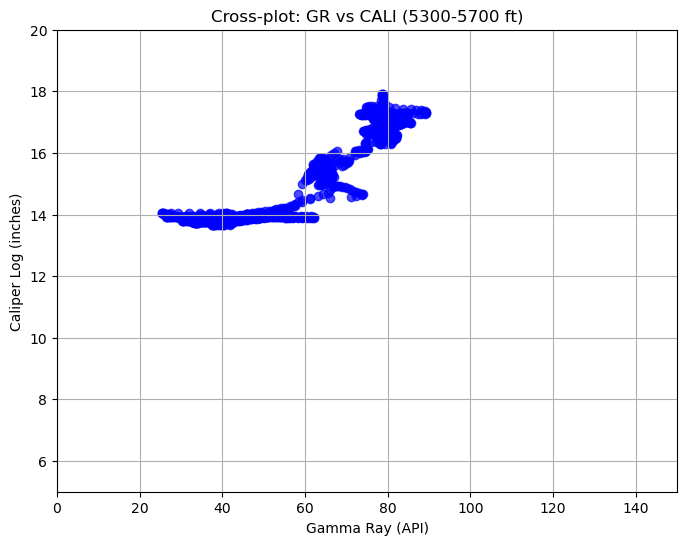

Number of distinct clusters: 2
Lithology Associations and Mechanical Behavior:
- Low GR & Smaller Caliper (~12-14 inches) -> Sandstone (Competent, minimal borehole enlargement)
- High GR & Larger Caliper (~14-18 inches) -> Shale (Ductile, prone to borehole enlargement)


In [7]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Create a deep copy of the filtered DataFrame to avoid SettingWithCopyWarning
df_crossplot_cali = df[(df['~A DEPTH'] >= 5300) & (df['~A DEPTH'] <= 5700)].copy()

# Convert CALI from feet to inches
df_crossplot_cali.loc[:, 'CALI_inches'] = df_crossplot_cali['CALI'] * 12

# Create cross-plot: GR vs CALI (in inches)
plt.figure(figsize=(8, 6))
plt.scatter(df_crossplot_cali['GR'], df_crossplot_cali['CALI_inches'], color='blue', alpha=0.7)

# Set axis limits as per problem statement
plt.xlim(0, 150)  # GR from 0 to 150 API
plt.ylim(5, 20)   # CALI from 5 to 20 inches

# Label axes and title
plt.xlabel("Gamma Ray (API)")
plt.ylabel("Caliper Log (inches)")
plt.title("Cross-plot: GR vs CALI (5300-5700 ft)")
plt.grid(True)

# Show plot
plt.show()

# Identify the number of clusters using KMeans
X_cali_corrected = df_crossplot_cali[['GR', 'CALI_inches']].dropna().values  # Remove NaNs before clustering

# Use KMeans clustering to determine clusters
num_clusters_cali = 2  # Assuming two dominant lithologies (sandstone & shale)
kmeans_cali_corrected = KMeans(n_clusters=num_clusters_cali, random_state=42, n_init=10)
kmeans_cali_corrected.fit(X_cali_corrected)

# Cluster centers
cluster_centers_cali_corrected = kmeans_cali_corrected.cluster_centers_

# Number of clusters identified
num_clusters_cali_corrected = len(cluster_centers_cali_corrected)
print(f"Number of distinct clusters: {num_clusters_cali_corrected}")

# Lithology association
print("Lithology Associations and Mechanical Behavior:")
print("- Low GR & Smaller Caliper (~12-14 inches) -> Sandstone (Competent, minimal borehole enlargement)")
print("- High GR & Larger Caliper (~14-18 inches) -> Shale (Ductile, prone to borehole enlargement)")
